In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

In [2]:
np.random.seed(4242)

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
import pandas as pd
import numpy as np
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_pandas import DataFrameMapper

In [5]:
adv_df = pd.read_csv('adv_df.csv')

In [6]:
adv_df.tail()

,Unnamed: 0,Player,StartYr,EndYr,SalStartYr,SalEndYr,Salary,SalaryInfl,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,years_of_exp,salary_cap,salary_cap_adjusted,Per_of_Salary_Cap
6217,16844,Delon Wright,2019,2020,2020,2021,9000000.0,8526316.0,PG,27,DAL,73,5.0,21.5,2.6,5.6,0.462,0.6,1.7,0.370,2.0,3.9,0.504,0.519,1.1,1.4,0.770,1.0,2.9,3.8,3.3,1.2,0.3,1.0,1.3,6.9,5,109140000,NaN,0.082463
6218,16846,Thaddeus Young,2019,2020,2020,2021,13545000.0,14190000.0,PF,31,CHI,64,16.0,24.9,4.2,9.4,0.448,1.2,3.5,0.356,3.0,5.9,0.501,0.513,0.7,1.1,0.583,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3,13,109140000,NaN,0.124107
6219,16847,Trae Young,2019,2020,2020,2021,6571800.0,8326471.0,PG,21,ATL,60,60.0,35.3,9.1,20.8,0.437,3.4,9.5,0.361,5.7,11.4,0.501,0.519,8.0,9.3,0.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2,109140000,NaN,0.060214
6220,16848,Cody Zeller,2019,2020,2020,2021,15415730.0,0.0,C,27,CHO,58,39.0,23.1,4.3,8.3,0.524,0.3,1.3,0.240,4.0,7.0,0.577,0.543,2.1,3.1,0.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1,7,109140000,NaN,0.141247
6221,16851,Ivica Zubac,2019,2020,2020,2021,7000000.0,7518518.0,C,22,LAC,72,70.0,18.4,3.3,5.3,0.613,0.0,0.0,0.000,3.3,5.3,0.616,0.613,1.7,2.3,0.747,2.7,4.8,7.5,1.1,0.2,0.9,0.8,2.3,8.3,4,109140000,NaN,0.064138


In [7]:
len(adv_df['Player'].unique())


1306

In [8]:
adv_df.drop(adv_df.columns[0], axis = 1, inplace = True)


In [9]:
christine_subset = adv_df[['FG', 'FTA', 'AST', 'TRB', 'PTS', 'BLK', 'years_of_exp','Salary','SalStartYr','TOV','Age','G','Pos']]


In [10]:
christine_subset = christine_subset[christine_subset['years_of_exp'] == 1]


In [11]:
christine_subset.drop(columns = 'years_of_exp', axis = 1, inplace = True)


In [12]:
q1 = christine_subset['Salary'].quantile(.25)
q1

767791.5

In [13]:
q3 = christine_subset['Salary'].quantile(.75)
q3

2176200.0

In [14]:
iqr = q3 - q1
iqr

1408408.5

In [15]:
lower = q1 - 1.5 * iqr
lower

-1344821.25

In [16]:
upper = q3 + 1.5 * iqr
upper

4288812.75

In [17]:
christine_subset.shape


(879, 12)

In [18]:
outliers = christine_subset[christine_subset['Salary'] >= upper]
len(outliers)

56

In [19]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
christine_subset['SalStartYr'] = le.fit_transform(christine_subset['SalStartYr'])
christine_subset['Pos'] = le.fit_transform(christine_subset['Pos'])

In [20]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as pl

In [21]:
to_elbow = christine_subset.drop(columns = 'Salary', axis = 1)


In [22]:
distortions = []
inertias = []

K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(to_elbow)
    kmeanModel.fit(to_elbow)
 
    distortions.append(sum(np.min(cdist(to_elbow, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / to_elbow.shape[0])
    
    inertias.append(kmeanModel.inertia_)

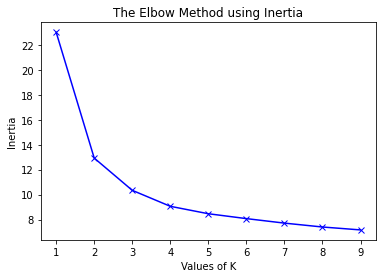

In [23]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [24]:
kmeans=KMeans(n_clusters=3,random_state=1)


In [25]:
kmeans.fit(to_elbow)


KMeans(n_clusters=3, random_state=1)

In [26]:
to_elbow['Cluster'] = kmeans.labels_


In [27]:
to_elbow['Cluster'].unique()


array([1, 0, 2], dtype=int32)

In [28]:
to_elbow.shape


(879, 12)

In [29]:
christine_subset['Cluster'] = to_elbow['Cluster']


In [30]:
christine_subset.head()

,FG,FTA,AST,TRB,PTS,BLK,Salary,SalStartYr,TOV,Age,G,Pos,Cluster
3,3.7,2.3,1.0,2.2,9.5,0.1,1418400.0,0,1.2,23,65,3,1
43,0.7,1.2,0.2,1.5,2.1,0.1,465850.0,0,0.6,23,15,2,0
50,2.1,1.8,2.7,1.7,5.4,0.0,1347480.0,0,1.8,23,78,3,1
53,1.2,1.0,0.3,1.6,3.1,0.1,1280040.0,0,0.5,23,23,0,0
55,1.8,0.6,2.3,1.5,4.6,0.2,1894560.0,0,1.4,20,61,3,1


In [31]:
df = christine_subset.loc[:,'FG':]
cluster_0 = df[df["Cluster"] == 0]
cluster_1 = df[df["Cluster"] == 1]
cluster_2 = df[df["Cluster"] == 2]

In [32]:
x_0 = cluster_0.loc[:, :"Pos"]
y_0 = cluster_0["Salary"]
x_1 = cluster_1.loc[:, :"Pos"]
y_1 = cluster_1["Salary"]
x_2 = cluster_2.loc[:, :"Pos"]
y_2 = cluster_2["Salary"]

In [33]:
x_0 = x_0.drop('Salary',axis=1)
x_1 = x_1.drop('Salary',axis=1)
x_2 = x_2.drop('Salary',axis=1)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(x_0, y_0, test_size = 0.2, random_state = 9149)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1, y_1, test_size = 0.2, random_state = 9149)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_2, y_2, test_size = 0.2, random_state = 9149)

In [36]:
reg_0 = LinearRegression()
reg_0.fit(x_train0, y_train0)
reg_0.score(x_test0, y_test0)

0.22675699952561645

In [37]:
predicted_0 = reg_0.predict(x_test0)

In [38]:
np.sqrt(mean_squared_error(y_true = y_test0, y_pred = predicted_0))

1037152.1430428469

In [39]:
reg_1 = LinearRegression()
reg_1.fit(x_train1, y_train1)
reg_1.score(x_test1, y_test1)

0.5026136526107831

In [40]:
predicted_1 = reg_1.predict(x_test1)

In [41]:
np.sqrt(mean_squared_error(y_true = y_test1, y_pred = predicted_1))

1143150.2275505317

In [42]:
reg_2 = LinearRegression()
reg_2.fit(x_train2, y_train2)
reg_2.score(x_test2, y_test2)

0.33833781999381884

In [43]:
predicted_2 = reg_1.predict(x_test2)

In [44]:
np.sqrt(mean_squared_error(y_true = y_test2, y_pred = predicted_2))

984549.4750244463